In [89]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Management

### 1-1. Read the data set

In [90]:
# Read the train.csv data file.
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [92]:
# According to the data description, these are ordinal or categorical column.
num_to_cat_list = ['MSSubClass','OverallQual','OverallCond','MoSold']
# Transform numeric data types into string data type.
df[num_to_cat_list] = df[num_to_cat_list].astype(str)

In [93]:
# The data type should be floating point because it indicates sqft.
df['MasVnrArea'] = df['MasVnrArea'].astype(np.float)

In [94]:
# Categorical columns.
categ_df = df.select_dtypes(include=['object'])
categ_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [95]:
# Numerical columns.
numer_df = df.select_dtypes(exclude=['object']).drop(columns='SalePrice')
numer_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')

### 1-2. Missing Values

In [96]:
# There are missing values.
df.isnull().any().sum()

19

In [97]:
#Show features with at least some NaN values
null_counts = df.isnull().sum()
null_cols = []
##print("Percentage of null values in each column:\n")
for i in range(len(null_counts)):
    if null_counts[i] != 0:
        #print(null_counts.index[i], null_counts[i]/len(df))
        null_cols.append(null_counts.index[i])

<AxesSubplot:title={'center':'Missing Value Counts'}, ylabel='Frequency'>

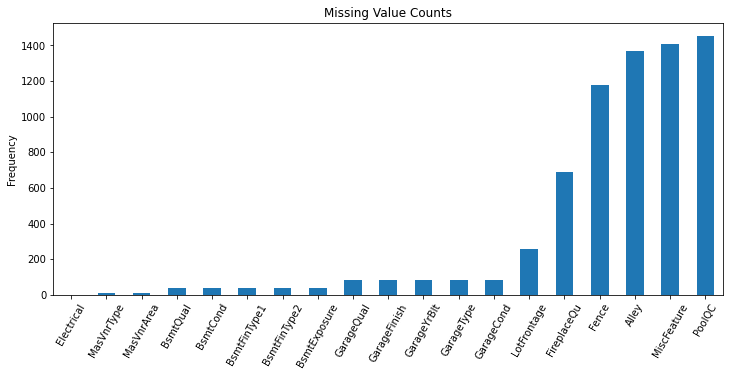

In [98]:
# Plot missing values.
# Number of "NA" in each column.
na_series = df.isnull().sum().sort_values()
na_series[na_series.values >0].plot(kind='bar',figsize=(12,5), rot=60,ylabel = 'Frequency', 
               title = 'Missing Value Counts')

In [99]:
#Columns that have the data description with an explanation for NaN values
##Basically indicates a lack of the feature is specified
valid_none_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType',
                'GarageFinish','GarageQual','FireplaceQu','GarageCond']

##Filling in with value 'None' to indicate for machine learning later
df[valid_none_cols]= df[valid_none_cols].fillna('None')
df[valid_none_cols].isna().any().sum() # No more NAs.

0

In [100]:
#Organizing the other features with NaN values into numerical and categorical features
#"Invalid" simply means the data description didn't specify NaN values

invalid_none_cols = np.array(null_cols)
#Fill with feature names in null_cols that only are NOT already in valid_none_cols
invalid_none_cols = invalid_none_cols[[i not in valid_none_cols for i in invalid_none_cols]]

#Splitting
invalid_none_categ = invalid_none_cols[[i in categ_df for i in invalid_none_cols]]
print(invalid_none_categ)

['Alley' 'MasVnrType' 'Electrical' 'PoolQC' 'Fence' 'MiscFeature']


In [101]:
invalid_none_numer = invalid_none_cols[[i in numer_df for i in invalid_none_cols]]
print(invalid_none_numer)

['LotFrontage' 'MasVnrArea' 'GarageYrBlt']


#### Comment:
- From data_description.txt file:

    PoolQC: Pool quality

           Ex	Excellent
           Gd	Good
           TA	Average/Typical
           Fa	Fair
           NA	No Pool

    Fence: Fence quality

           GdPrv	Good Privacy
           MnPrv	Minimum Privacy
           GdWo	Good Wood
           MnWw	Minimum Wood/Wire
           NA	No Fence

    MiscFeature: Miscellaneous feature not covered in other categories

           Elev	Elevator
           Gar2	2nd Garage (if not described in garage section)
           Othr	Other
           Shed	Shed (over 100 SF)
           TenC	Tennis Court
           NA	None

- When read_csv() function reads the csv file, it reads NA as NaN value(as data is missing, unregistered). However, according to the data description, 'NA' is one of feature level to describ there is no feature in the corresponding house.
- Regardless this information, it is right call to drop these columns because it has too many 'NA' levels(more than half of data) which means it will not likely affect the SalePrice anyway.

In [102]:
# Remove unnecessary features.
df = df.drop(columns=["Id", "Alley","PoolQC","Fence","MiscFeature"])

In [103]:
# According to data description file, the most columns uses 'NA' as 'No fireplace', 'No basement' and etc.
# However, MasVnrType/Electrical column contains 'NA' without any designation. Then it should be missing value.

bad_categ  = pd.concat([df['MasVnrType'],df['Electrical']],axis=1)
#Getting the particular rows in the df with NaN values
bad_rows = bad_categ[bad_categ.isna().any(axis=1)]
#Deleting these rows from the total df
df = df.drop(bad_rows.index)
#Categories without NaN descriptions should no longer have NaN values

In [104]:
# 9 rows are dropped.
df.shape

(1451, 76)

In [105]:
##IMPUTING NUMERICAL FEATURES
#For the most part these values can be assumed to indicate 0 when not filled with a number
##LotFrontage has many missing values, so all 0 wouldn't be great
#GarageYrBlt makes no sense with a value of 0. We'll change these two individually
df['LotFrontage'].loc[df['LotFrontage'].isnull()].shape # 257 NAs.

(257,)

In [106]:
#Imputing LotFrontage by assuming the fill takes on the median value
#Perhaps this can be improved with comparisons to the LotArea feature?
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'].isna().sum() # 0 NAs.

0

Text(0, 0.5, 'Year Built')

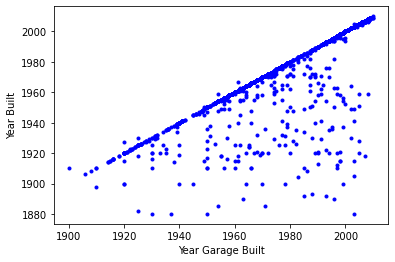

In [107]:
#Imputing GarageYrBlt based on the year the house was built
plt.plot(df["GarageYrBlt"],df["YearBuilt"],"b.")
plt.xticks(np.arange(min(df["GarageYrBlt"]),max(df["GarageYrBlt"]),20.0))
plt.xlabel("Year Garage Built")
plt.ylabel("Year Built")

In [108]:
#seems like the garage is built around the same year as the house or a bit later
#Again use the median value to fill in
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df['YearBuilt']-(df['GarageYrBlt']-df['YearBuilt']).median())

#Fill the rest of the null values to 0
for i in invalid_none_numer:
    df[i] = df[i].fillna(0)

### 1-3. The response variable (SalePrice) Transformation
- src: https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

/Users/anchal/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


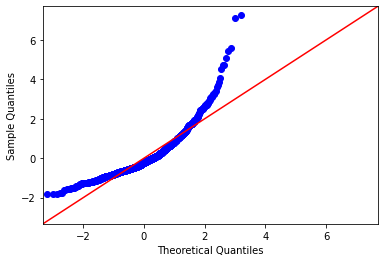

In [109]:
# See if SalePrice column is normal.
# !pip install statsmodels
import statsmodels.api as sm
from scipy.stats import boxcox

# Use Q-Q plot to see normality. It is supposed to be straight line.
fig = sm.qqplot(df['SalePrice'], fit= True, line="45")
plt.show()

#### Comment: 
- Since we are going to use linear regression models, it is necessary to transform the response variable normally distributed. Becuase the response variable is linear combination of feature variables.

/Users/anchal/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


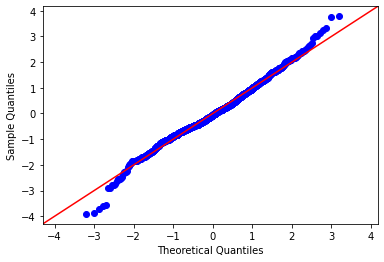

In [110]:
# Log transformation. (Better)
fig = sm.qqplot(np.log(df['SalePrice']), fit= True, line="45")
plt.show()

/Users/anchal/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


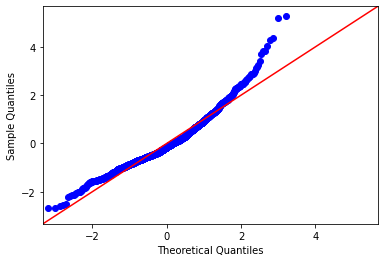

In [111]:
# Sqrt transformation. (Worse)
fig = sm.qqplot(np.sqrt(df['SalePrice']), fit= True, line="45")
plt.show()

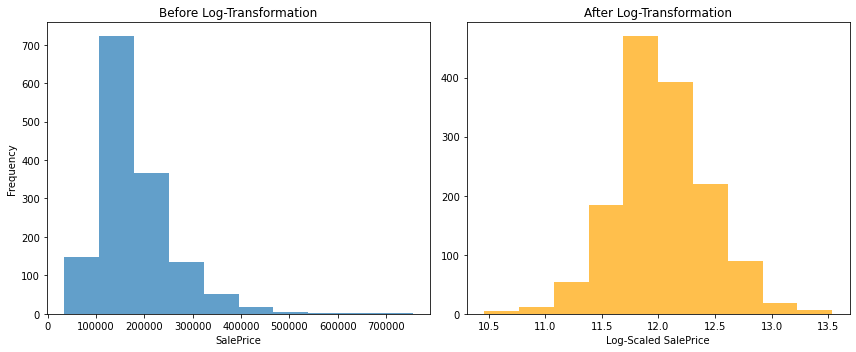

In [112]:
# Compare distribution.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot.
ax1.hist(df['SalePrice'], alpha=0.7)
ax1.set_title("Before Log-Transformation")
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('Frequency')
# Right plot.
ax2.hist(np.log(df['SalePrice']), alpha=0.7, color='orange')
ax2.set_title('After Log-Transformation')
ax2.set_xlabel('Log-Scaled SalePrice')

plt.tight_layout()
plt.show()

#### Comment:
- Since log transformation normalizes the response variable, apply log transformation on SalePrice column.

In [113]:
# Apply log transformation.
df['SalePrice'] = np.log(df['SalePrice'])

### 1-4. Removing Outliers

In [114]:
# GrLivArea and GarageArea columns have relatively large correlation with the SalePrice.
# Use scatterplots to detect the outliers.
def visualDetectionOutlier(train_df):
    sp = train_df['SalePrice']
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(7,12))
    axes[0].scatter(x=train_df['GrLivArea'],y=sp, alpha=0.5)
    axes[0].set_title("GrLivArea vs SalePrice")
    axes[0].set_xlabel("sqft")
    axes[0].set_ylabel("Price")
    axes[1].scatter(x=train_df['GarageArea'],y=sp, alpha=0.5)
    axes[1].set_title("GarageArea vs SalePrice")
    axes[1].set_xlabel("sqft")
    axes[1].set_ylabel("Price")
    fig.tight_layout()
    plt.show()

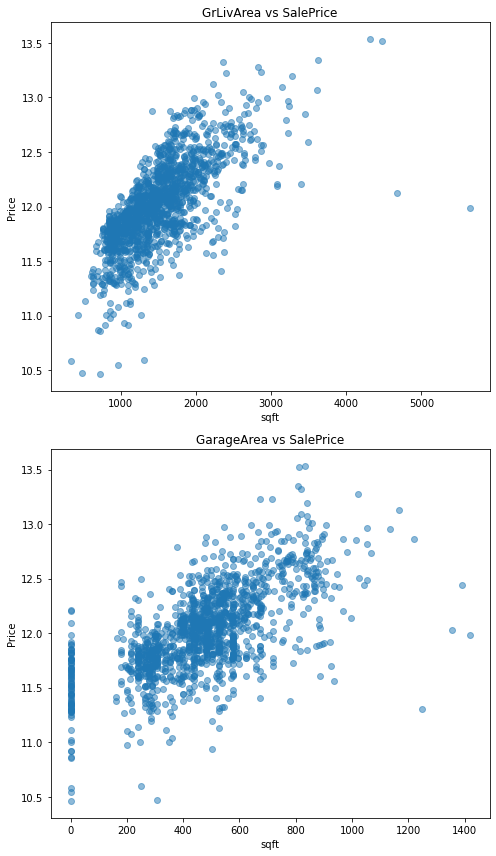

In [115]:
# Before removing outliers.
visualDetectionOutlier(df)

In [116]:
# [Plot 1: GrLivArea vs SalePrice] Bottom right two points look like outliers.
ol_plot1_bottomright = df.loc[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
# [Plot 2: GarageArea vs SalePrice] Bottom right four points look like outliers.
ol_plot2_bottomright = df.loc[((df['GarageArea'] > 1200) & (df['SalePrice'] < 300000))]
# [Plot 2: GarageArea vs SalePrice] Top middle two points look like outliers.
ol_plot2_topmiddle = df.loc[((df['GarageArea'] > 800) & (df['GarageArea'] < 1000)) &
                                  (df['SalePrice'] > 700000)]
# Remove the outliers.
df = df.drop(ol_plot1_bottomright.index.append(ol_plot2_bottomright.index).
                         append(ol_plot2_topmiddle.index))

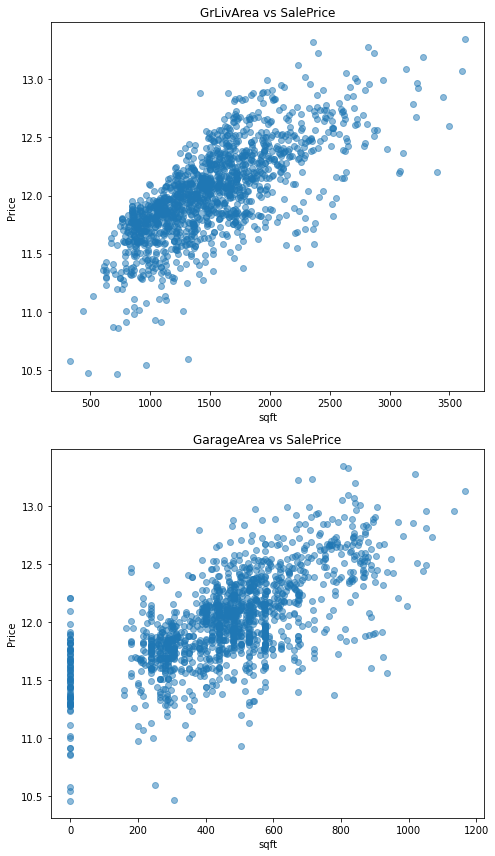

In [117]:
# Check out the linearity again.
visualDetectionOutlier(df)

### 1-5. Min-Max Scale Numerical Columns

In [118]:
# Select categorical and numerical columns from the cleaned dataframe.
categ_df = df.select_dtypes(include=['object'])
numer_df = df.select_dtypes(exclude=['object']).drop(columns='SalePrice')

In [119]:
# Transform numerical columns.
# Use MinMaxScaler.
scaler = MinMaxScaler()

# Numerical column names.
numer_col_names = numer_df.columns
numer_col_names

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold'],
      dtype='object')

In [120]:
# Transform the numerical columsn.
df[numer_col_names] = scaler.fit_transform(df[numer_col_names])
df[numer_col_names]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,0.150685,0.033420,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,0.266999,0.180373,...,0.50,0.469983,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.50
1,0.202055,0.038795,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,0.393637,0.320663,...,0.50,0.394511,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.25
2,0.160959,0.046507,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,0.286962,0.202488,...,0.50,0.521441,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.50
3,0.133562,0.038561,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,0.235808,0.216655,...,0.75,0.550600,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.00
4,0.215753,0.060576,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,0.357143,0.280235,...,0.75,0.716981,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.297255,0.213891,...,0.50,0.394511,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.25
1456,0.219178,0.055505,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,0.480973,0.600898,...,0.50,0.428816,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,1.00
1457,0.154110,0.036187,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,0.359326,0.295093,...,0.25,0.216123,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,1.00
1458,0.160959,0.039342,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,0.336245,0.257084,...,0.25,0.205832,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,1.00


### 1-6. Correlation Matrix 

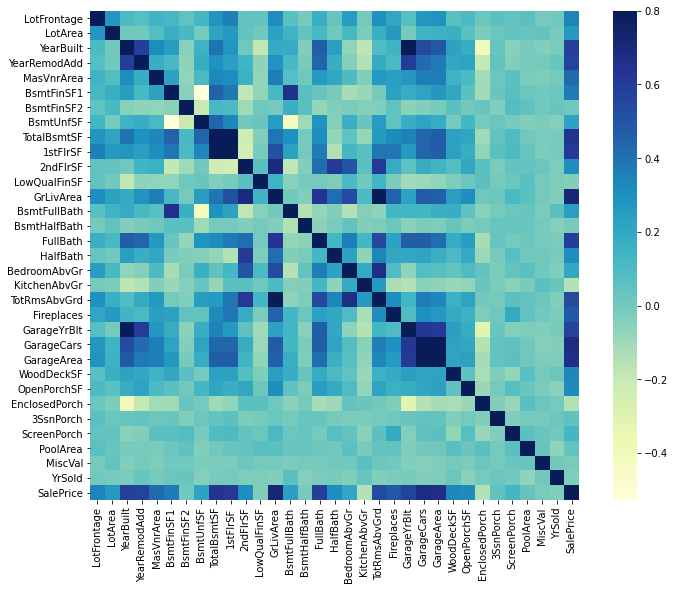

In [121]:
# Correlation matrix.
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='YlGnBu');

In [122]:
#Find out which parameters appear to have an appreciable linear relationship with SalePrice
#Arbitrary 0.5 correlation cutoff
print("List of parameters that have a good linear model fit to Sale Price")
corr_series = corrmat['SalePrice'].sort_values()[:-1]
good_params = corr_series[(corr_series > 0.5) | (corr_series < -0.5)]
good_params

List of parameters that have a good linear model fit to Sale Price


TotRmsAbvGrd    0.535635
YearRemodAdd    0.566891
GarageYrBlt     0.571302
YearBuilt       0.587201
FullBath        0.591328
1stFlrSF        0.613928
TotalBsmtSF     0.640654
GarageArea      0.666923
GarageCars      0.684121
GrLivArea       0.718665
Name: SalePrice, dtype: float64

In [123]:
# Correlation between SalePrice and other variables.
# Sorted from the least to the most correlated. Exclude SalePrice vs SalePrice corr.
corrmat.loc['SalePrice'].abs().sort_values(ascending=False)[1:]

GrLivArea        0.718665
GarageCars       0.684121
GarageArea       0.666923
TotalBsmtSF      0.640654
1stFlrSF         0.613928
FullBath         0.591328
YearBuilt        0.587201
GarageYrBlt      0.571302
YearRemodAdd     0.566891
TotRmsAbvGrd     0.535635
Fireplaces       0.488206
MasVnrArea       0.426611
BsmtFinSF1       0.378682
LotFrontage      0.342499
WoodDeckSF       0.331922
OpenPorchSF      0.323636
2ndFlrSF         0.310751
HalfBath         0.309967
LotArea          0.260770
BsmtFullBath     0.235625
BsmtUnfSF        0.224954
BedroomAbvGr     0.208011
KitchenAbvGr     0.150184
EnclosedPorch    0.149259
ScreenPorch      0.126086
3SsnPorch        0.057026
PoolArea         0.041235
LowQualFinSF     0.037301
YrSold           0.033518
MiscVal          0.018007
BsmtHalfBath     0.013811
BsmtFinSF2       0.007980
Name: SalePrice, dtype: float64

In [124]:
# Find the list of good numerical good parameters.
good_numer = numer_df.columns.intersection(good_params.index)
good_numer

Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [125]:
# To find row numbers for plots.
np.ceil(np.sqrt(len(good_numer)))

4.0

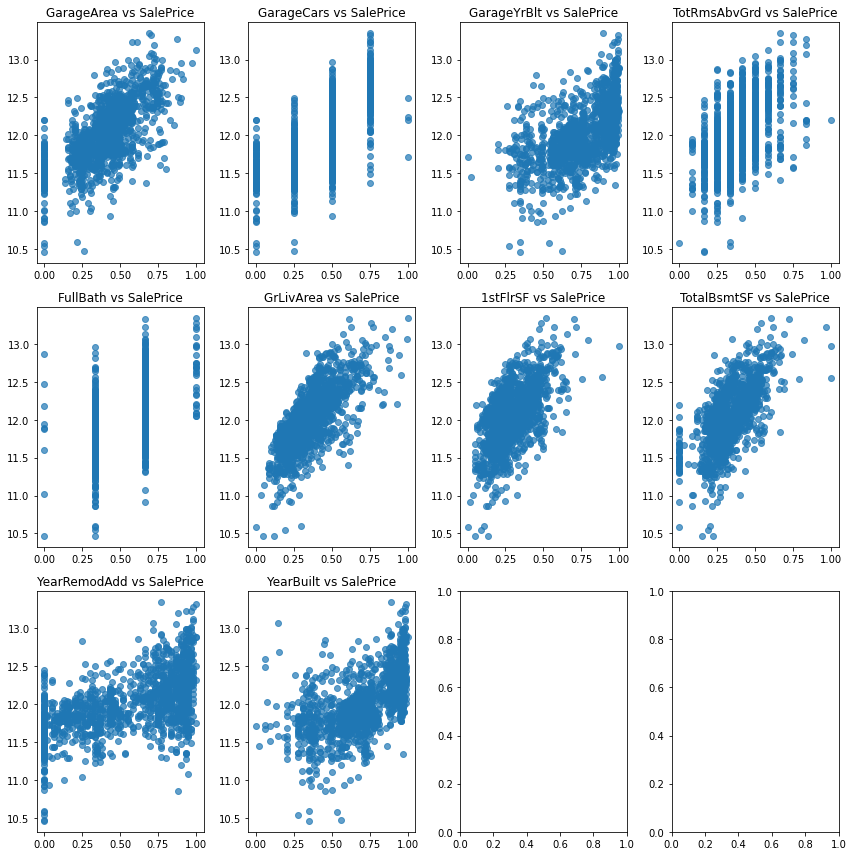

In [126]:
# Make it list.
lst_gn = list(good_numer)

# Plot highly correlated numerical columns against SalePrice.
fig, axs = plt.subplots(3,4, figsize=(12,12))

for i in range(0,4):
    for j in range(0,4):
        if len(lst_gn) > 0:
            col = lst_gn.pop()
        else:
            break
        axs[i,j].scatter(df[col],df['SalePrice'],alpha=0.7)
        axs[i,j].set_title('{} vs SalePrice'.format(col))
            
plt.tight_layout()
plt.show()

### 1-7. One-Hot Encoding Categorical Columns

In [127]:
# The categorical columns to be encoded.
categ_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [128]:
#Pandas One Hot Encoding.
df = pd.get_dummies(df, columns=categ_df.columns,prefix=categ_df.columns, drop_first=True)

In [129]:
df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,0.266999,0.180373,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,0.393637,0.320663,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,0.286962,0.202488,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,0.235808,0.216655,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,0.357143,0.280235,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.297255,0.213891,...,0,0,0,0,1,0,0,0,1,0
1456,0.219178,0.055505,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,0.480973,0.600898,...,0,0,0,0,1,0,0,0,1,0
1457,0.154110,0.036187,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,0.359326,0.295093,...,0,0,0,0,1,0,0,0,1,0
1458,0.160959,0.039342,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,0.336245,0.257084,...,0,0,0,0,1,0,0,0,1,0


In [130]:
df.shape

(1443, 283)

In [131]:
# Feature variables.
X = df.copy().drop(columns='SalePrice')
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,0.266999,0.180373,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,0.393637,0.320663,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,0.286962,0.202488,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,0.235808,0.216655,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,0.357143,0.280235,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.297255,0.213891,...,0,0,0,0,1,0,0,0,1,0
1456,0.219178,0.055505,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,0.480973,0.600898,...,0,0,0,0,1,0,0,0,1,0
1457,0.154110,0.036187,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,0.359326,0.295093,...,0,0,0,0,1,0,0,0,1,0
1458,0.160959,0.039342,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,0.336245,0.257084,...,0,0,0,0,1,0,0,0,1,0


In [132]:
# Response variable.
y = df['SalePrice'].copy()
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1443, dtype: float64

# 2. Machine Learning and Algorithms

### 2-1. Feature Selection
As visualized above, there are 282 features left after extensive data preprocessing and cleaning. In order to identify the best set of features that would enable our model to accurately predict the ```SalePrice```, we need to perform the feature selection process. From [Scikit-Learn](https://scikit-learn.org/stable/modules/feature_selection.html), we attempted three separate methods:

1. VarianceThreshold() 
2. SelectFromModel() using Lasso Regression
3. Recursive Feature Elimination using Random Forest Regressor

After comparing each method's impact on the R^2 scores and MSE values for the ML regression methods, we came to the conclusion that the SelectFromModel() using Lasso Regression had the best effect, slightly increasing the R^2 scores and decreasing the MSE values.

In [133]:
# SelectFromModel() using Lasso Regression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
Lasso = LassoCV(cv=10)
selector = SelectFromModel(Lasso).fit(X, y)
selected_features = X.columns[(selector.get_support())]
print('selected features:', len(selected_features))
selected_features

selected features: 157


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_9', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal'],
      dtype='object', length=157)

In [134]:
df2 = pd.concat([X[selected_features], y], axis=1)

In [135]:
df2

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,...,MoSold_6,MoSold_7,MoSold_9,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SalePrice
0,0.150685,0.033420,0.949275,0.883333,0.322669,0.000000,0.266999,0.180373,0.417856,0.333333,...,0,0,0,0,0,1,0,0,1,12.247694
1,0.202055,0.038795,0.753623,0.433333,0.446984,0.000000,0.393637,0.320663,0.281810,0.000000,...,0,0,0,0,0,1,0,0,1,12.109011
2,0.160959,0.046507,0.934783,0.866667,0.222121,0.000000,0.286962,0.202488,0.440935,0.333333,...,0,0,1,0,0,1,0,0,1,12.317167
3,0.133562,0.038561,0.311594,0.333333,0.098720,0.000000,0.235808,0.216655,0.419982,0.333333,...,0,0,0,0,0,1,0,0,0,11.849398
4,0.215753,0.060576,0.927536,0.833333,0.299360,0.000000,0.357143,0.280235,0.566049,0.333333,...,0,0,0,0,0,1,0,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.920290,0.833333,0.000000,0.000000,0.297255,0.213891,0.398725,0.000000,...,0,0,0,0,0,1,0,0,1,12.072541
1456,0.219178,0.055505,0.768116,0.633333,0.361060,0.110583,0.480973,0.600898,0.528090,0.333333,...,0,0,0,0,0,1,0,0,1,12.254863
1457,0.154110,0.036187,0.500000,0.933333,0.125686,0.000000,0.359326,0.295093,0.609171,0.000000,...,0,0,0,0,0,1,0,0,1,12.493130
1458,0.160959,0.039342,0.565217,0.766667,0.022395,0.698100,0.336245,0.257084,0.225934,0.333333,...,0,0,0,0,0,1,0,0,1,11.864462


### 2-2. Split the Dataset 

In [136]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:,:157]
y = df2.iloc[:,157]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.2)

In [137]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,...,MoSold_5,MoSold_6,MoSold_7,MoSold_9,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
90,0.133562,0.027577,0.565217,0.000000,0.000000,0.0,0.000000,0.243953,0.214394,0.0,...,0,0,1,0,0,0,1,0,0,1
84,0.164384,0.033794,0.891304,0.766667,0.000000,0.0,0.119775,0.162405,0.346189,0.0,...,1,0,0,0,0,0,1,0,0,1
506,0.202055,0.038580,0.876812,0.733333,0.173675,0.0,0.242358,0.252592,0.478895,0.0,...,0,0,0,1,0,0,1,0,0,1
516,0.164384,0.042759,0.724638,0.366667,0.000000,0.0,0.214910,0.360746,0.542059,0.0,...,0,0,0,0,0,0,0,0,0,0
1195,0.102740,0.031452,0.963768,0.916667,0.000000,0.0,0.227074,0.136144,0.340723,0.0,...,0,0,1,0,0,0,1,0,0,1


In [138]:
y_train.head()

90      11.607326
84      12.034691
506     12.278393
516     11.970350
1195    12.078239
Name: SalePrice, dtype: float64

### 2-3. Regression Methods

Each regression method has been researched and chosen for its capabilities in supervised learning, especially regression. In order to avoid using biased models, 10-fold cross validation has been used to generalize each model based on the given data set. Specifically, the R^2 score and MSE has been obtained for each iteration of the cross validation, as well as the average of both metrics.

#### 2-3-1. Ridge Regression
This linear model utilizes the least squares loss function and L2 regularization. The estimator has built-in support for multivariate regression, where it imposes a penalty on the size of the model coefficients for robustness to collinearity.

In [139]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.5)
# ridgeReg.fit(X_train, y_train)
# print('Ridge')
# print(ridgeReg.score(X_test, y_test)) # returns R^2 score

In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import *

cv = KFold(n_splits=10, random_state=21, shuffle=True)

r2_ridge = cross_val_score(ridgeReg, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_ridge = cross_val_score(ridgeReg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_ridge)
print("\n")
print("Mean R^2 Score:", mean(r2_ridge))
print("\n")
print("MSE:", abs(mse_ridge))
print("\n")
print("Mean MSE Value:", abs(mean(mse_ridge)))

R^2 Score: [0.91579966 0.9327697  0.92276102 0.91327879 0.93332233 0.91302244
 0.92788435 0.92716391 0.89448819 0.93259064]


Mean R^2 Score: 0.9213081029747141


MSE: [0.01119675 0.00943708 0.01150821 0.01288254 0.01184677 0.01297847
 0.01186199 0.01161688 0.01744969 0.01134699]


Mean MSE Value: 0.012212537105781228


#### 2-3-2. Lasso Regression

This linear model estimates sparse coefficients through coordinate descent. Unlike ridge regression, the lasso estimate solves the minimization of the least-squares penalty with L1 regularization.

In [141]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha = 0.5)
# lassoReg.fit(X_train, y_train)
# print('Lasso')
# print(lassoReg.score(X_test, y_test)) # returns R^2 score

In [142]:
r2_lasso = cross_val_score(lassoReg, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_lasso = cross_val_score(lassoReg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_lasso)
print("\n")
print("Mean R^2 Score:", mean(r2_lasso))
print("\n")
print("MSE:", abs(mse_lasso))
print("\n")
print("Mean MSE Value:", abs(mean(mse_lasso)))

R^2 Score: [-1.28050776e-02 -1.07636039e-05 -6.14948583e-05 -1.26188294e-06
 -5.83888152e-03 -8.92347894e-05 -1.10165790e-02 -2.42146147e-02
 -3.38708753e-03 -4.16809986e-04]


Mean R^2 Score: -0.005784180554372997


MSE: [0.13468025 0.14037102 0.14900402 0.14855134 0.17870968 0.14922959
 0.16629767 0.16335552 0.16594159 0.16839979]


Mean MSE Value: 0.15645404747634253


#### 2-3-3. XGBoost Regression
This model is an implementation of the gradient boosting trees algorithm for regression predictive modeling.

In [143]:
# !pip install xgboost
from xgboost import XGBRegressor

XGB = XGBRegressor()
# XGB.fit(X_train, y_train)
# print(XGB.score(X_test, y_test)) # returns R^2 score

In [144]:
r2_XGB = cross_val_score(XGB, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_XGB = cross_val_score(XGB, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_XGB)
print("\n")
print("Mean R^2 Score:", mean(r2_XGB))
print("\n")
print("MSE:", abs(mse_XGB))
print("\n")
print("Mean MSE Value:", abs(mean(mse_XGB)))

R^2 Score: [0.88424841 0.8746331  0.89958722 0.82170803 0.88286329 0.87424112
 0.87723388 0.89321373 0.8497431  0.92711491]


Mean R^2 Score: 0.8784586781825788


MSE: [0.01539235 0.01759769 0.01496099 0.02648548 0.02081195 0.01876527
 0.02019326 0.01703171 0.0248497  0.01226872]


Mean MSE Value: 0.018835711786344748


#### 2-3-4. KNN Regression
This model performs regression based on k-nearest neighbors, where the target variable is predicted by local interpolation of the subsets of nearest neighbors in the training set.

In [145]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
# KNN.fit(X_train,y_train)
# print(KNN.score(X_test, y_test)) # returns R^2 score

In [146]:
r2_KNN = cross_val_score(KNN, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_KNN = cross_val_score(KNN, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_KNN)
print("\n")
print("Mean R^2 Score:", mean(r2_KNN))
print("\n")
print("MSE:", abs(mse_KNN))
print("\n")
print("Mean MSE Value:", abs(mean(mse_KNN)))

R^2 Score: [0.77840339 0.74387883 0.79851789 0.71476785 0.76816783 0.77855988
 0.80655485 0.81322441 0.73086903 0.81453643]


Mean R^2 Score: 0.7747480401523651


MSE: [0.02946735 0.0359516  0.0300198  0.04237157 0.04119015 0.03304247
 0.03181894 0.02978948 0.04450926 0.03121901]


Mean MSE Value: 0.03493796412780226


#### 2-3-5. Linear Regression
This model performs ordinary least squares linear regression by minimizing the residual sum of squares between the observed targets (predicted by linear approximation) in the dataset.

In [147]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
# LR.fit(X_train, y_train)
# LR.score(X_train, y_train) # returns R^2 score

In [148]:
r2_LR = cross_val_score(LR, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_LR = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_LR)
print("\n")
print("Mean R^2 Score:", mean(r2_LR))
print("\n")
print("MSE:", abs(mse_LR))
print("\n")
print("Mean MSE Value:", abs(mean(mse_LR)))

R^2 Score: [0.9125863  0.93034554 0.92098709 0.91701081 0.92918646 0.91538098
 0.92518308 0.92754505 0.89898229 0.92411856]


Mean R^2 Score: 0.9201326162216852


MSE: [0.01162405 0.00977736 0.01177252 0.01232814 0.0125816  0.01262653
 0.01230631 0.01155609 0.01670645 0.01277309]


Mean MSE Value: 0.012405215266363952


#### 2-3-6. Random Forest Regression
This model uses a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset, and uses averaging to improve the predictive accuracy and control over-fitting.

In [149]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
# rfr.fit(X_train, y_train)
# print(rfr.score(X_test, y_test)) # returns R^2 score

In [150]:
r2_rfr = cross_val_score(rfr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_rfr = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_rfr)
print("\n")
print("Mean R^2 Score:", mean(r2_rfr))
print("\n")
print("MSE:", abs(mse_rfr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_rfr)))

R^2 Score: [0.88401212 0.89218497 0.90099734 0.85305518 0.85277807 0.86141437
 0.86840257 0.88791028 0.84626802 0.90511424]


Mean R^2 Score: 0.8752137163442771


MSE: [0.01575135 0.01650167 0.01384338 0.02211529 0.02645071 0.02060672
 0.02104491 0.01780872 0.02515061 0.0159272 ]


Mean MSE Value: 0.019520055197287334


#### 2-3-7. Support Vector Regression
This model identifies the data points within the epsilon-defined error decision boundary to produce a line of best fit for predicting discrete values. For our dataset, the linear kernel was the best fit.

In [151]:
from sklearn.svm import SVR
# from sklearn.metrics import r2_score

svr = SVR(kernel='linear')
# svr.fit(X_train, np.asarray(y_train))
# y_pred_svr = svr.predict(X_test)
# r2_score(y_test, y_pred_svr) # returns R^2 score

In [152]:
r2_svr = cross_val_score(svr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_svr = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_svr)
print("\n")
print("Mean R^2 Score:", mean(r2_svr))
print("\n")
print("MSE:", abs(mse_svr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_svr)))

R^2 Score: [0.90920591 0.92313634 0.91608953 0.91435899 0.92742144 0.90728509
 0.92097287 0.92307866 0.88378519 0.9284953 ]


Mean R^2 Score: 0.9153829327889408


MSE: [0.01207357 0.01078931 0.01250223 0.01272207 0.0128952  0.01383457
 0.01299883 0.01226845 0.01921977 0.01203636]


Mean MSE Value: 0.01313403570592751


#### 2-3-8. Neural Network
Due to the high complexity within this dataset, we built our own layered neural network to model the regression process.

In [55]:
# !pip install keras
# !pip install tensorflow
import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state = 21)
X_val, X_test, Y_val, Y_test = train_test_split(x_test_nn, y_test_nn, test_size=0.5)

In [57]:
# creating model
model = keras.Sequential()

# I will be testing out activation rectifided linear units
# first layer (input layer)
model.add(keras.layers.Dense(60, activation='relu', input_shape=(157,)))
# second layer
# now using sigmoid as activation 
model.add(keras.layers.Dense(60, activation='sigmoid'))
# third layer
# output layer should still only be one (sale price)
model.add(keras.layers.Dense(1))

# using mean squared error for metric because it is regression problem
model.compile(optimizer='adam', loss= 'mean_squared_error', metrics = ['mean_squared_error'])

In [58]:
# train the model

# testing different number of epochs
hist=model.fit(x_train_nn,y_train_nn, epochs=150, validation_data=(X_val, Y_val))

Epoch 1/150
37/37 [==============================] - 10s 12ms/step - loss: 136.4669 - mean_squared_error: 136.4669 - val_loss: 59.9053 - val_mean_squared_error: 59.9053
Epoch 2/150
37/37 [==============================] - 0s 1ms/step - loss: 48.2150 - mean_squared_error: 48.2150 - val_loss: 26.6019 - val_mean_squared_error: 26.6019
Epoch 3/150
37/37 [==============================] - 0s 1ms/step - loss: 24.1310 - mean_squared_error: 24.1310 - val_loss: 16.1118 - val_mean_squared_error: 16.1118
Epoch 4/150
37/37 [==============================] - 0s 1ms/step - loss: 14.7063 - mean_squared_error: 14.7063 - val_loss: 9.5325 - val_mean_squared_error: 9.5325
Epoch 5/150
37/37 [==============================] - 0s 1ms/step - loss: 8.8018 - mean_squared_error: 8.8018 - val_loss: 5.4257 - val_mean_squared_error: 5.4257
Epoch 6/150
37/37 [==============================] - 0s 1ms/step - loss: 4.9783 - mean_squared_error: 4.9783 - val_loss: 2.9556 - val_mean_squared_error: 2.9556
Epoch 7/150
37/3

37/37 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 102/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 103/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 104/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 105/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 106/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 107/150
37/37 [===============

In [59]:
#evaluating the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model.evaluate(x_test_nn, y_test_nn)[1]
m1y_test_pred = model.predict(x_test_nn)
m1y_train_pred = model.predict(x_train_nn)

mse_nn = mean_squared_error(y_test_nn, m1y_test_pred)
r2_nn =  r2_score(y_test_nn, m1y_test_pred)
print("MSE:", mse_nn, "R2_NN:", r2_nn)

MSE: 0.013631264908344121 R2_NN: 0.9004539635724889


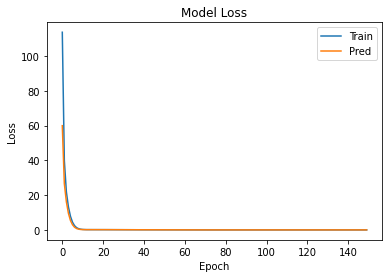

In [60]:
# plotting to look for overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Pred'], loc = 'upper right')
plt.show()

### 2-4. Results
Below are the R^2 scores and MSE values for each regression method with the default hyperparameters. As we can see, ridge regression had the best results, followed by linear regression.

In [153]:
# !pip install prettytable
from prettytable import PrettyTable 
  
# Specify the column Names while initializing the table 
myTable = PrettyTable(["ML Algorithm", "Avg R^2 Score", "Avg MSE"]) 

# Add rows 
myTable.add_row(["Ridge", mean(r2_ridge), abs(mean(mse_ridge))])
myTable.add_row(["Linear", mean(r2_LR), abs(mean(mse_LR))]) 
myTable.add_row(["SVR", mean(r2_svr), abs(mean(mse_svr))]) 
myTable.add_row(["Neural Network", r2_nn, mse_nn])
myTable.add_row(["XGBoost", mean(r2_XGB), abs(mean(mse_XGB))])
myTable.add_row(["Random Forest", mean(r2_rfr), abs(mean(mse_rfr))]) 
myTable.add_row(["KNN", mean(r2_KNN), abs(mean(mse_KNN))]) 
myTable.add_row(["Lasso", mean(r2_lasso), abs(mean(mse_lasso))])
  
print(myTable)

+----------------+-----------------------+----------------------+
|  ML Algorithm  |     Avg R^2 Score     |       Avg MSE        |
+----------------+-----------------------+----------------------+
|     Ridge      |   0.9213081029747141  | 0.012212537105781228 |
|     Linear     |   0.9201326162216852  | 0.012405215266363952 |
|      SVR       |   0.9153829327889408  | 0.01313403570592751  |
| Neural Network |   0.9004539635724889  | 0.013631264908344121 |
|    XGBoost     |   0.8784586781825788  | 0.018835711786344748 |
| Random Forest  |   0.8752137163442771  | 0.019520055197287334 |
|      KNN       |   0.7747480401523651  | 0.03493796412780226  |
|     Lasso      | -0.005784180554372997 | 0.15645404747634253  |
+----------------+-----------------------+----------------------+


### 2-5. Finding Optimal Hyperparameters

We will use GridSearch() to populate optimal hyperparameters for the above regression methods. In this section and the following section, we will exclude lasso regression, as its R^2 scores were negative and indicate a worse fit than the mean line. Additionally, we will exclude the neural network because optimization has already been attempted through trial-and-error of the number of hidden layers, neurons, activations, and epochs.

#### 2-5-1. Ridge Regression

In [106]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

alpha = [0.05, 0.1, 0.5, 1, 2, 3, 4, 4.5, 5, 5.5, 6]
tol = [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
parameter_space = {
    'alpha' : alpha,
    'tol'   : tol,
}

In [107]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(ridgeReg, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'alpha': 0.5, 'tol': 0.0001}
Best score :
 0.9183787421950826


#### 2-5-2. XGBoost Regression

In [80]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html

learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
n_estimators = [1000, 2000, 500]
max_depth = [5, 6, 7, 8, 9, 10]

parameter_space = {
    'learning_rate' : learning_rate,
    'n_estimators': n_estimators,
    'max_depth' : max_depth
}

In [81]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(XGB, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000}
Best score :
 0.8993433917433228


#### 2-5-3. KNN Regression

In [82]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
leaf_size = [2, 5, 7, 10, 20, 30]

parameter_space = {
    'n_neighbors' : n_neighbors,
    'leaf_size': leaf_size
}

In [83]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(KNN, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'leaf_size': 2, 'n_neighbors': 7}
Best score :
 0.7764670637059556


#### 2-5-4. Linear Regression

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
normalize = [True, False]

parameter_space = {
    'normalize' : normalize,
}

In [85]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(LR, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'normalize': True}
Best score :
 0.9156872023885485


#### 2-5-5. Random Forest Regression

In [86]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

min_samples_leaf = [1, 2, 3, 4, 5]
n_estimators = [1000, 2000, 500]
# max_depth = [5, 6, 7, 8, 9, 10]

parameter_space = {
    'min_samples_leaf' : min_samples_leaf,
    'n_estimators': n_estimators
    #'max_depth' : max_depth
}

In [87]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(rfr, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'min_samples_leaf': 1, 'n_estimators': 2000}
Best score :
 0.8729666936288091


#### 2-5-6. Support Vector Regression

In [88]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

C = [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1.0, 10.0]
epsilon = [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1.0, 10.0]

parameter_space = {
    'C' : C,
    'epsilon': epsilon
}

In [89]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(svr, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'C': 1.0, 'epsilon': 0.005}
Best score :
 0.9219454924090803


### 2-6. Implementation of Optimal Hyperparameters
Now, we will implement the obtained hyperparameters in our initial regression methods. Once again, we will be exclusing lasso regression and the neural network.

#### 2-6-1. Ridge Regression

In [160]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.5, tol = 0.0001)
# ridgeReg.fit(X_train, y_train)
# print('Ridge')
# print(ridgeReg.score(X_test, y_test)) # returns R^2 score

In [161]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import *

cv = KFold(n_splits=10, random_state=21, shuffle=True)

r2_ridge = cross_val_score(ridgeReg, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_ridge = cross_val_score(ridgeReg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_ridge)
print("\n")
print("Mean R^2 Score:", mean(r2_ridge))
print("\n")
print("MSE:", abs(mse_ridge))
print("\n")
print("Mean MSE Value:", abs(mean(mse_ridge)))

R^2 Score: [0.91579966 0.9327697  0.92276102 0.91327879 0.93332233 0.91302244
 0.92788435 0.92716391 0.89448819 0.93259064]


Mean R^2 Score: 0.9213081029747141


MSE: [0.01119675 0.00943708 0.01150821 0.01288254 0.01184677 0.01297847
 0.01186199 0.01161688 0.01744969 0.01134699]


Mean MSE Value: 0.012212537105781228


After performing GridSearch, there is no change in the average scores. This means that the default parameters were optimal.

#### 2-6-2. XGBoost Regression

In [78]:
# !pip install xgboost
from xgboost import XGBRegressor
XGB = XGBRegressor(learning_rate = 0.05, max_depth = 5, n_estimators = 1000)
# XGB.fit(X_train, y_train)
# print(XGB.score(X_test, y_test)) # returns R^2 score

In [79]:
r2_XGB = cross_val_score(XGB, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_XGB = cross_val_score(XGB, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_XGB)
print("\n")
print("Mean R^2 Score:", mean(r2_XGB))
print("\n")
print("MSE:", abs(mse_XGB))
print("\n")
print("Mean MSE Value:", abs(mean(mse_XGB)))

R^2 Score: [0.90115492 0.91239525 0.91027006 0.88197903 0.90169638 0.89250953
 0.89974238 0.91710079 0.88240005 0.935682  ]


Mean R^2 Score: 0.9034930388466688


MSE: [0.01314417 0.01229704 0.0133693  0.01753215 0.01746583 0.01603933
 0.01649093 0.01322188 0.01944885 0.01082663]


Mean MSE Value: 0.014983609885065727


After performing GridSearch, there is a decent increase in the average R^2 score and decrease in MSE value.

#### 2-6-3. KNN Regression

In [80]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(leaf_size = 2, n_neighbors = 7)
# KNN.fit(X_train,y_train)
# print(KNN.score(X_test, y_test)) # returns R^2 score

In [81]:
r2_KNN = cross_val_score(KNN, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_KNN = cross_val_score(KNN, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_KNN)
print("\n")
print("Mean R^2 Score:", mean(r2_KNN))
print("\n")
print("MSE:", abs(mse_KNN))
print("\n")
print("Mean MSE Value:", abs(mean(mse_KNN)))

R^2 Score: [0.78255355 0.75283004 0.782098   0.71792834 0.77624673 0.79330948
 0.80175875 0.79406542 0.73111068 0.79640768]


Mean R^2 Score: 0.7728308658232684


MSE: [0.02891548 0.03469513 0.03246628 0.04190207 0.03975475 0.03084159
 0.03260783 0.03284522 0.0444693  0.03427062]


Mean MSE Value: 0.035276826240965856


After performing GridSearch, there is a slight increase in the average R^2 score and decrease in MSE value.

#### 2-6-4. Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
# LR.fit(X_train, y_train)
# LR.score(X_train, y_train) # returns R^2 score

In [83]:
r2_LR = cross_val_score(LR, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_LR = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_LR)
print("\n")
print("Mean R^2 Score:", mean(r2_LR))
print("\n")
print("MSE:", abs(mse_LR))
print("\n")
print("Mean MSE Value:", abs(mean(mse_LR)))

R^2 Score: [0.91597585 0.93029831 0.92119611 0.91706952 0.92918975 0.91536887
 0.92515085 0.92754548 0.89861673 0.92422966]


Mean R^2 Score: 0.9204641129618735


MSE: [0.01117332 0.00978399 0.01174138 0.01231942 0.01258102 0.01262834
 0.01231161 0.01155602 0.01676691 0.01275439]


Mean MSE Value: 0.012361639516191167


After performing GridSearch, there is a decent increase in the average R^2 score and decrease in MSE value.

#### 2-6-5. Random Forest Regression

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(min_samples_leaf = 1, n_estimators = 2000)
# rfr.fit(X_train, y_train)
# print(rfr.score(X_test, y_test))

In [85]:
r2_rfr = cross_val_score(rfr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_rfr = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_rfr)
print("\n")
print("Mean R^2 Score:", mean(r2_rfr))
print("\n")
print("MSE:", abs(mse_rfr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_rfr)))

R^2 Score: [0.88335455 0.88382032 0.90704243 0.85403344 0.8522473  0.86448451
 0.8689868  0.88954544 0.8507096  0.90701648]


Mean R^2 Score: 0.8761240872679814


MSE: [0.01561078 0.01654568 0.01386037 0.02164481 0.02628796 0.02024772
 0.02144392 0.01783531 0.02461983 0.01572708]


Mean MSE Value: 0.01938234607136116


After performing GridSearch, there is a slight increase in the average R^2 score and decrease in MSE value.

#### 2-6-6. Support Vector Regression

In [86]:
from sklearn.svm import SVR
# from sklearn.metrics import r2_score

svr = SVR(kernel='linear', C = 1, epsilon = 0.005)
# svr.fit(X_train, np.asarray(y_train))
# y_pred_svr = svr.predict(X_test)
# r2_score(y_test, y_pred_svr) # returns R^2 score

In [87]:
r2_svr = cross_val_score(svr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_svr = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_svr)
print("\n")
print("Mean R^2 Score:", mean(r2_svr))
print("\n")
print("MSE:", abs(mse_svr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_svr)))

R^2 Score: [0.91240858 0.93108424 0.9272325  0.91462794 0.93334181 0.91533287
 0.92484807 0.92826653 0.89469962 0.93641559]


Mean R^2 Score: 0.9218257748780413


MSE: [0.01164768 0.00967367 0.01084198 0.01268212 0.01184331 0.01263371
 0.01236141 0.01144102 0.01741473 0.01070314]


Mean MSE Value: 0.012124277991002975


After performing GridSearch, there is a slight increase in the average R^2 score and decrease in MSE value.

## 3. Final Results
Below are the R^2 scores and MSE values for each regression method after implementing the optimal hyperparameters. As we can see, support vector regression had the best results, followed by ridge regression.

In [88]:
# !pip install prettytable
from prettytable import PrettyTable 
  
# Specify the column Names while initializing the table 
myTable = PrettyTable(["ML Algorithm", "Avg R^2 Score", "Avg MSE"]) 

# Add rows 
myTable.add_row(["SVR", mean(r2_svr), abs(mean(mse_svr))]) 
myTable.add_row(["Ridge", mean(r2_ridge), abs(mean(mse_ridge))])
myTable.add_row(["Linear", mean(r2_LR), abs(mean(mse_LR))]) 
myTable.add_row(["Neural Network", r2_nn, mse_nn])
myTable.add_row(["XGBoost", mean(r2_XGB), abs(mean(mse_XGB))])
myTable.add_row(["Random Forest", mean(r2_rfr), abs(mean(mse_rfr))]) 
myTable.add_row(["KNN", mean(r2_KNN), abs(mean(mse_KNN))]) 
  
print(myTable)

+----------------+--------------------+----------------------+
|  ML Algorithm  |   Avg R^2 Score    |       Avg MSE        |
+----------------+--------------------+----------------------+
|      SVR       | 0.9218257748780413 | 0.012124277991002975 |
|     Ridge      | 0.9213081029747141 | 0.012212537105781228 |
|     Linear     | 0.9204641129618735 | 0.012361639516191167 |
| Neural Network | 0.9004539635724889 | 0.013631264908344121 |
|    XGBoost     | 0.9034930388466688 | 0.014983609885065727 |
| Random Forest  | 0.8761240872679814 | 0.01938234607136116  |
|      KNN       | 0.7728308658232684 | 0.035276826240965856 |
+----------------+--------------------+----------------------+


## 4. Discussion
We want to analyze why Lasso regression had a negative R^2 score.

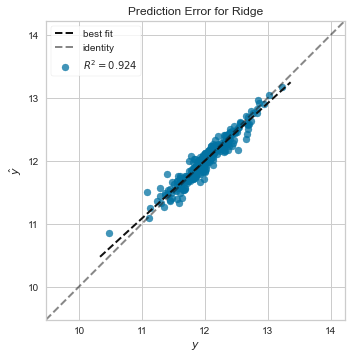

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [162]:
visualizer = PredictionError(ridgeReg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

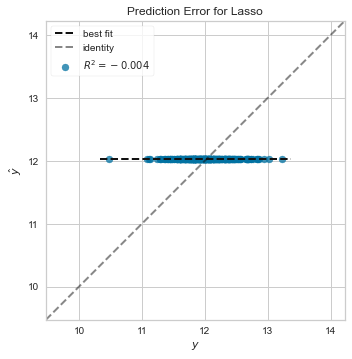

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [163]:
# !pip install yellowbrick
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lassoReg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

As observed, there is a stark performance difference between ridge regression and lasso regression. The prediction error plot of Lasso regression indicates that the mean of the data provides a better fit to the prediction of SalePrice than the model itself, explaining the negativity of the accuracy scores.